# Homework 1 — Problem 1(c): Wholesale Customers (Assignment)

Dataset: <https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set>

This solution segments wholesale customers with **K-Means**, selects **K** using the **Elbow Method** (with silhouette as a sanity check), evaluates **PCA** pre-processing effects, and produces **cluster profiles** with **marketing recommendations**.


# Fill before submitting
- **Student:** `Zach Hatzenbeller`
- **Course:** `Data Science Modeling & Analytics`
- **Homework:** `HW #1`
- **Date:** `2025-09-14`
- **Instructor:** `Ben Rodriguez, PhD`

---

## What to Submit in your `.ipynb`
Your notebook must include, in this order:

1. **Cover Block** — Name, course, HW #, date.  
2. **README (Execution & Setup)** — Python version; required packages + install steps; dataset source + download/use instructions; end‑to‑end run steps; any hardware notes (GPU/CPU).  
3. **Adjustable Inputs** — A single, clearly marked code cell where we can change paths, seeds, and key hyperparameters.  
4. **Problem Sections** — Each problem and sub‑part clearly labeled (e.g., “Problem 1 (a)”).  
5. **Results, Summary & Conclusions** — Your takeaways, trade‑offs, limitations.  
6. **References & Attributions** — Cite datasets, code you reused, articles, and **any AI tools** used (and how).

> **One file only**. The notebook must run **top‑to‑bottom** with no errors.

---

## How You’re Graded (what “full credit” looks like)

**1) Completeness & Problem Coverage (20%)**  
<div style="margin-left: 40px"> To earn full points, students must ensure that all parts of the assignment, including sub-questions, are fully answered. Both qualitative and quantitative components should be addressed where required, and any coding tasks must be implemented completely without omissions. </div>

**2) Writing Quality, Technical Accuracy & Justification (20%)**  
<div style="margin-left: 40px"> Writing should be clear, concise, and demonstrate graduate-level quality. All technical content must be correct, and reasoning should be sound and well-supported. Students are expected to justify their design choices and conclusions with logical arguments that reflect a strong understanding of the material. </div>   

**3) Quantitative Work (0% on this HW)**  
<div style="margin-left: 40px"> Assignments should clearly state all assumptions before attempting solutions. Derivations and calculations must be shown step by step, either in Markdown cells or through annotated code. Final results should be presented with appropriate units and precision, ensuring they are easy to interpret and technically correct. </div>
 
**4) Code Quality, Documentation & Execution (30%)**  
<div style="margin-left: 40px"> Code must run from top to bottom without errors, avoiding “Traceback” or other runtime issues. Programs should follow best practices for naming, formatting, and organization, with descriptive variables and functions. Meaningful comments should be included to explain key logic, making the code both efficient and easy to follow. </div>

**5) Examples, Test Cases & Visuals (20%)**  
<div style="margin-left: 40px"> Students should include realistic examples and test cases that demonstrate program functionality, with outputs clearly labeled. Figures and tables must be properly titled, captioned, and have labeled axes. For machine learning tasks, particularly those with imbalanced datasets such as Credit Card Fraud or NSL-KDD, evaluation metrics must go beyond simple accuracy and include measures like precision, recall, F1-score, and ROC or PR curves. </div>

**6) Notebook README & Reproducibility (10%)**  
<div style="margin-left: 40px"> Each notebook must include a README section containing the Python version, a list of required packages with installation instructions, dataset details with download information, and complete steps to run the notebook. The work should be fully reproducible on another system, with seeds set for consistency and relative paths used instead of system-dependent absolute paths. </div>

---

## README (Execution & Setup)

**Use this section to make your notebook reproducible.**

- **Python version:** `3.11.1`
- **Required packages:** `numpy`, `pandas`, `scikit-learn`, `matplotlib`, `kaggleub`
- **Install instructions (if non-standard):**
  ```bash
  pip install numpy pandas scikit-learn matplotlib kagglehub
  ```
- **Datasets used:**
  - `Wholesale customers data.csv` was downloaded straight from kagglehub
  - All steps are in order and will clean/transform the dataset if necessary
- **How to run this notebook:**
  1. Run all cells in order (Kernel → Restart & Run All).
  2. Verify that all outputs match those in the **Sample Tests** section.
  3. Ensure figures and tables render correctly.

**README hint**: Place `creditcard.csv` in `./data/` (or set `DATA_PATH` below). The dataset can be downloaded from Kaggle. Due to size limits, keep only relative paths in this notebook.


In [1]:
# Environment Check (Example)
import sys, platform
print("Python:", sys.version.split()[0])
print("Platform:", platform.platform())
try:
    import numpy as np, pandas as pd
    print("NumPy:", np.__version__)
    print("Pandas:", pd.__version__)
except Exception as e:
    print("Optional packages missing or version check failed:", e)

Python: 3.11.1
Platform: Windows-10-10.0.26100-SP0
NumPy: 1.26.4
Pandas: 2.2.0


## Problem Statement for Problem 1(c): Wholesale Customers

1. **K-Means Segmentation**: Cluster wholesale customers and study how **K** affects segmentation. Use the **Elbow Method** to choose a good **K**.  
2. **PCA + Clustering**: Apply **PCA** for dimensionality reduction **before** clustering. How do outcomes change? Does the reduced data preserve core structure?  
3. **Actions**: Given segments, propose **marketing approaches** tailored to each cluster. How does clustering inform distinct customer types?


**Note**: Download the CSV from Kaggle and set the `DATA_PATH` below. The dataset typically includes spending features like `Fresh`, `Milk`, `Grocery`, `Frozen`, `Detergents_Paper`, and `Delicassen`, plus `Channel` and `Region` codes.


In [2]:
# Adjustable Inputs
USE_KAGGLE_DOWNLOAD = True
KAGGLE_DATASET = "binovi/wholesale-customers-data-set"
SCALE_FEATURES = True
N_INIT = "auto"
MAX_ITER = 300
SEED = 42

In [3]:
# Load CSV and normalize column names
import pandas as pd
from pathlib import Path
import kagglehub

if USE_KAGGLE_DOWNLOAD:
    # TODO: Use kagglehub to download; then set DATA_PATH to the downloaded CSV
    # import kagglehub
    from pathlib import Path
    download_dir = Path(kagglehub.dataset_download(KAGGLE_DATASET))
    DATA_PATH = str(next(download_dir.glob('*.csv')))
    pass

df = pd.read_csv(DATA_PATH)
df.columns = [c.strip().replace(' ', '_').replace('-', '_') for c in df.columns]
print('df shape:', df.shape)
display(df.head())

# Typical features: Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen, plus Channel, Region
expected_cols = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
print('Has expected spend columns?', all(col in df.columns for col in expected_cols))


df shape: (440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Has expected spend columns? True


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


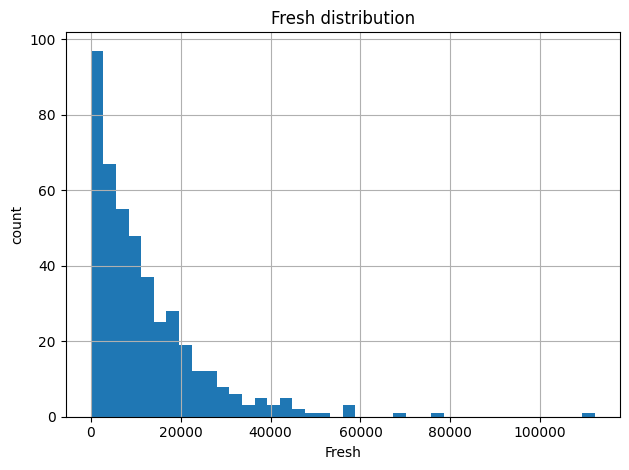

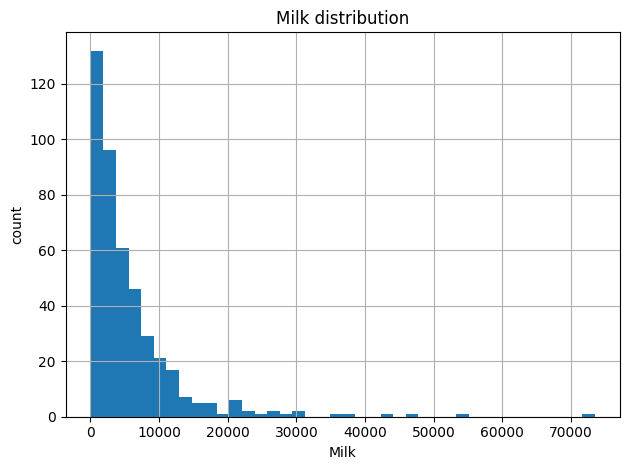

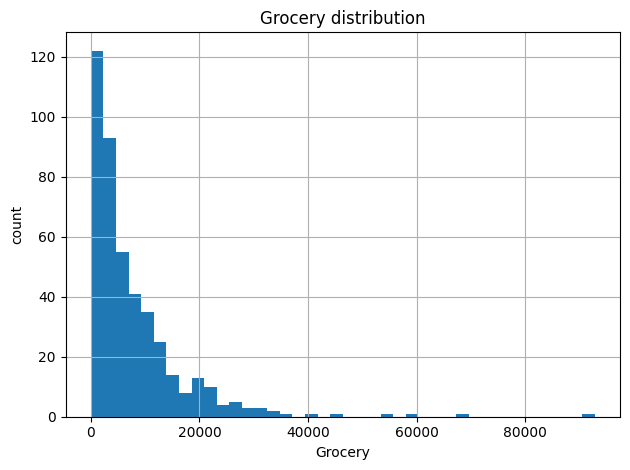

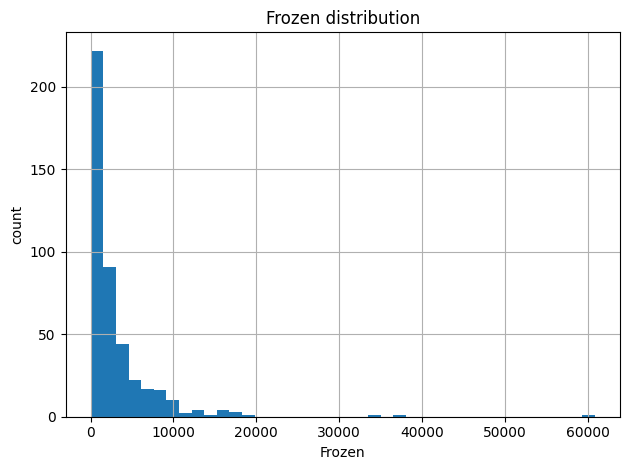

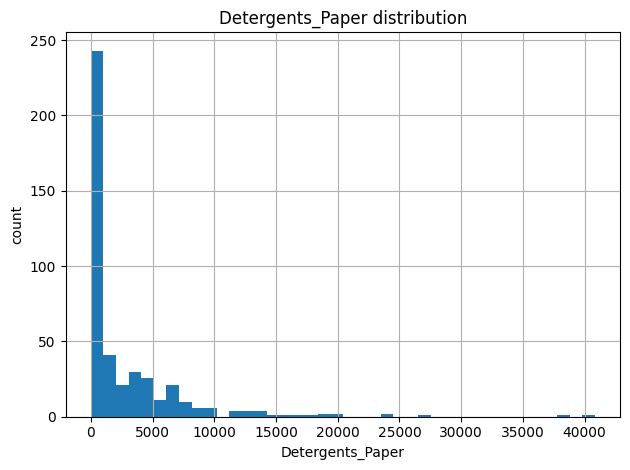

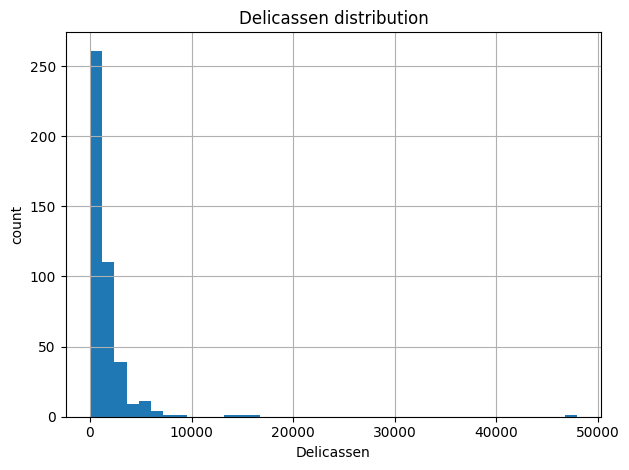

Skewness (spend columns):
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64


In [4]:
# Simple EDA: totals and distributions (matplotlib)
import matplotlib.pyplot as plt
import pandas as pd
spend_cols = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
display(df[spend_cols].describe())
for col in spend_cols:
    plt.figure()
    df[col].hist(bins=40)
    plt.title(f'{col} distribution')
    plt.xlabel(col); plt.ylabel('count')
    plt.tight_layout(); plt.show()
print('Skewness (spend columns):')
print(df[spend_cols].skew(numeric_only=True))


In [5]:
# Standardize features for clustering
from sklearn.preprocessing import StandardScaler
import pandas as pd
spend_cols = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
X = df[spend_cols].copy()
if SCALE_FEATURES:
    scaler = StandardScaler()
    X_std = scaler.fit_transform(X)
else:
    X_std = X.values
print('X_std shape:', X_std.shape)


X_std shape: (440, 6)


In [6]:
# Elbow Method (inertia) and silhouette across K
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertias, silhouettes = [], []

K_RANGE = np.arange(2, int(X.shape[0]/5))

for k in K_RANGE:
    # TODO: fit KMeans; record inertia and silhouette score
    km = KMeans(n_clusters=k, n_init=N_INIT, max_iter=MAX_ITER, random_state=SEED)
    labels = km.fit_predict(X_std)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_std, labels))
    pass
print('Computed metrics for K:', K_RANGE)

Computed metrics for K: [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87]


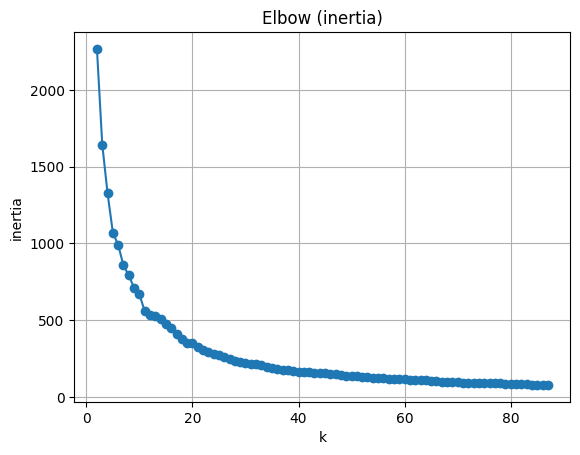

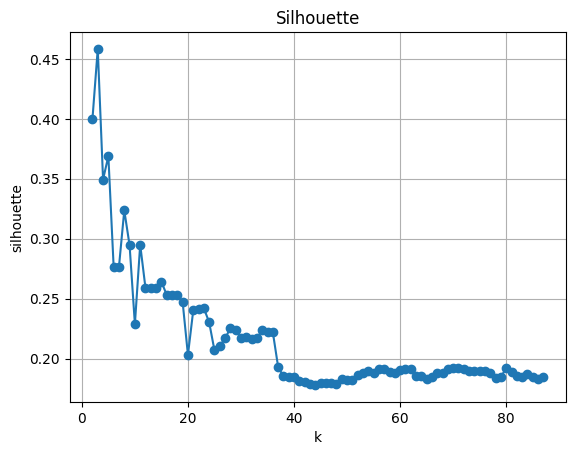

In [7]:
# Plots for Elbow (Inertia) and Silhouette
import matplotlib.pyplot as plt
# TODO: assume 'inertias' and 'silhouettes' lists are filled
plt.figure(); plt.plot(K_RANGE, inertias, marker='o');
plt.title('Elbow (inertia)'); plt.xlabel('k'); plt.ylabel('inertia'); plt.grid(True); plt.show()
plt.figure(); plt.plot(K_RANGE, silhouettes, marker='o');
plt.title('Silhouette'); plt.xlabel('k'); plt.ylabel('silhouette'); plt.grid(True); plt.show()


In [8]:
# Simple K selection (choose K)
import numpy as np
# TODO: choose K based on silhouette (tie-breaker: smaller K)
k_star = int(K_RANGE[int(np.argmax(silhouettes))])
print('Chosen K:', k_star)

Chosen K: 3


In [9]:
# Fit final KMeans and profile clusters
from sklearn.cluster import KMeans
import pandas as pd, numpy as np
# TODO: fit KMeans with k_star and assign cluster labels
km = KMeans(n_clusters=k_star, n_init=N_INIT, max_iter=MAX_ITER, random_state=SEED)
labels = km.fit_predict(X_std)
df_clusters = df.copy(); df_clusters['cluster'] = labels
sizes = df_clusters['cluster'].value_counts().sort_index()
display(sizes.to_frame('count').T)
profile = df_clusters.groupby('cluster')[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].mean()
display(profile)


cluster,0,1,2
count,350,53,37


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,8935.500000,4228.528571,5848.034286,2167.231429,1913.605714,1102.120000
1,34540.113208,5860.358491,6122.622642,9841.735849,981.471698,3664.245283
2,8704.864865,20534.405405,30466.243243,1932.621622,14758.837838,2459.351351


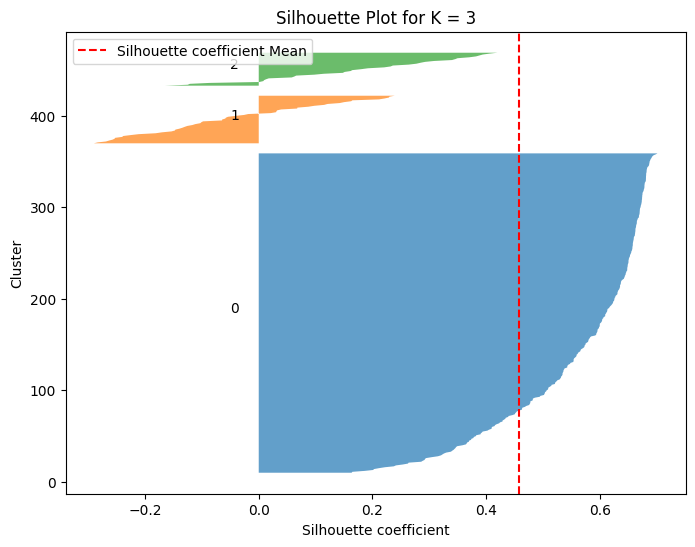

In [10]:
# Silhouette plot for chosen K
import numpy as np, matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples
# TODO: compute silhouette_samples for labels and plot distribution per cluster
sil = silhouette_samples(X_std, labels)

y_lower = 10
plt.figure(figsize=(8, 6))

for i in range(k_star):
    # Get silhouette values for cluster i
    cluster_sil_values = sil[labels == i]
    cluster_sil_values.sort()

    # Compute where to place them on y-axis
    size_cluster_i = cluster_sil_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Fill silhouette bars
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_sil_values,
                      alpha=0.7)

    # Label cluster number in the middle
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # add gap between clusters

# Vertical line for average silhouette score
plt.axvline(np.mean(sil), color="red", linestyle="--", label="Silhouette coefficient Mean")
plt.legend()
plt.xlabel("Silhouette coefficient")
plt.ylabel("Cluster")
plt.title("Silhouette Plot for K = {}".format(k_star))
plt.show()

In [11]:
# Calinski–Harabasz and Davies–Bouldin indices
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
# TODO: compute the indices for your chosen clustering
ch = calinski_harabasz_score(X_std, labels)
db = davies_bouldin_score(X_std, labels)
print({'calinski_harabasz': ch, 'davies_bouldin': db})


{'calinski_harabasz': 132.3631389342484, 'davies_bouldin': 1.2490949174866433}


In [12]:
# Export cluster assignments to CSV (optional)
from pathlib import Path
# TODO: Save df with 'cluster' column to a CSV for submission if required
OUT_PATH = './wholesale_clusters.csv'
df_clusters.to_csv(OUT_PATH, index=False)
print('Saved to', OUT_PATH)


Saved to ./wholesale_clusters.csv


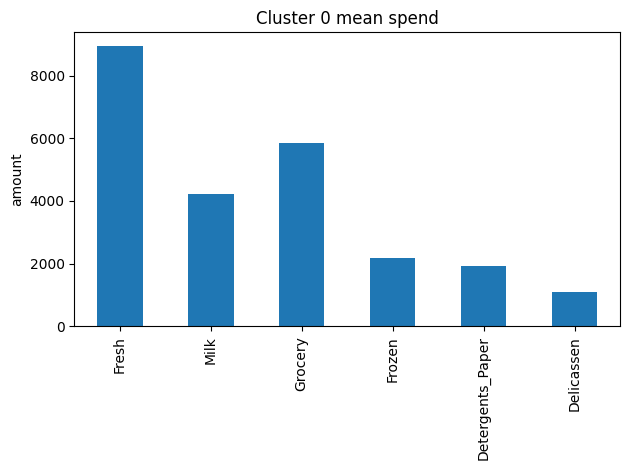

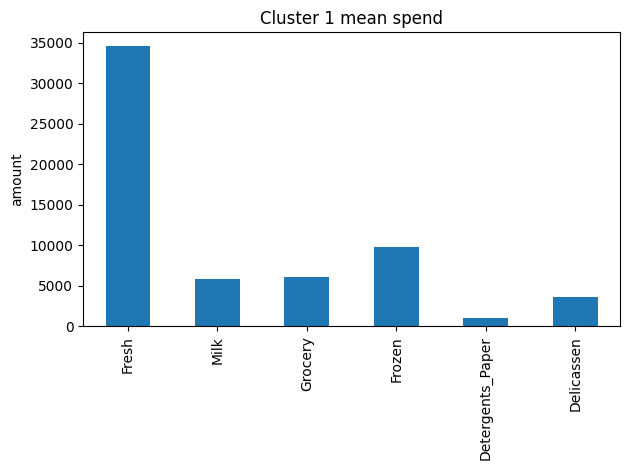

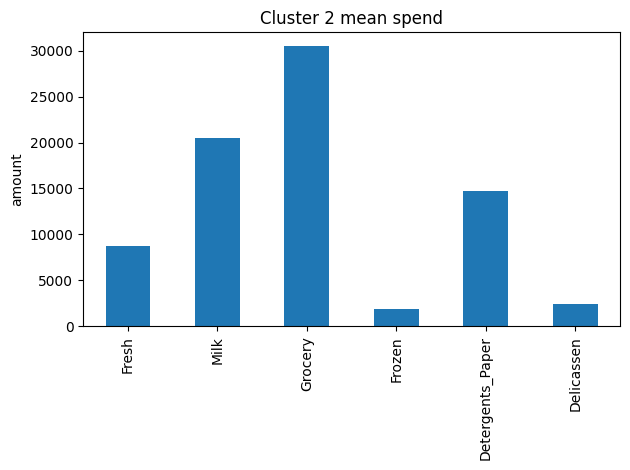

In [13]:
# Per-cluster spending profile bars
import matplotlib.pyplot as plt
import pandas as pd
# TODO: Plot per-cluster mean spend for each category as bar charts.
for c in sorted(df_clusters['cluster'].unique()):
    df_clusters[df_clusters['cluster']==c][['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].mean().plot(kind='bar')
    plt.title(f'Cluster {c} mean spend'); plt.ylabel('amount'); plt.tight_layout(); plt.show()


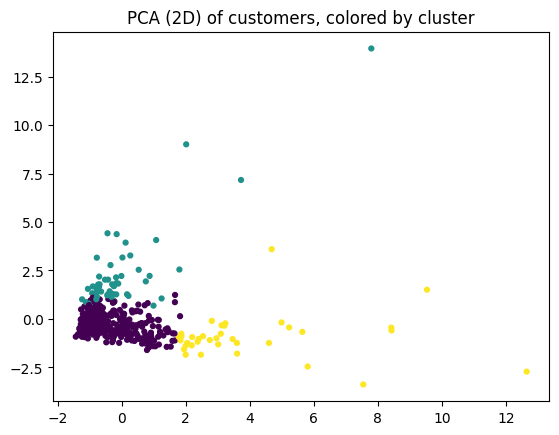

In [14]:
# Optional: PCA (2D) projection for visualization
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# TODO: Fit PCA(n_components=2) on X_std and scatter plot points colored by cluster labels
pca = PCA(n_components=2, random_state=SEED)
Z = pca.fit_transform(X_std)
plt.figure(); plt.scatter(Z[:,0], Z[:,1], c=labels, s=12)
plt.title('PCA (2D) of customers, colored by cluster'); plt.show()


## Targetted Promotion Analysis

### Cluster 0 Analysis

Cluster 0 mean spending habits show that these wholesale customers are mainly focused on buying Fresh products. There is also indication of grocery and some milk product purchases within this group although not as strong as fresh products. Targetted promotions for Fresh products would be beneficial within this group. Grocery promotions would also be effective within group 0 curstomers.

### Cluster 1 Analysis

Cluster 1 customers have a clear focus on fresh products. Targetted promotions would benefit the most from focusing on just fresh products within this cluster and ignoring oter products lines as they do not generate similar revenue compared to fresh products.

### Cluster 2 Analysis

Cluster 2 customers seem to be focused on buying mainly grocery products compared to other categories although milk and detergents are runner ups in terms of sales. For targeted promotions it would be best to focus on these three categories.

## Findings & Discussion

- **Elbow & Silhouette**: The elbow plot reveals diminishing returns in inertia; silhouette helps avoid over-fragmentation by penalizing poor separation.  
- **Chosen K**: Report and justify the selected `K` (by elbow bend and silhouette peak). Inspect cluster sizes and centers to ensure business plausibility.  
- **PCA Effects**: PCA often **stabilizes** K-Means (less noise/covariance) and can **improve** silhouette for moderate `K`. If the 2D PCA plot shows overlapping clusters, that suggests limited separability in linear subspace.  
- **Interpretability**: Use **original-scale centers** to describe segments (e.g., “high detergents/paper,” “fresh-heavy”).  
- **Actionability**: Recommendations align promotions, bundling, and pricing with the **dominant categories** in each segment.


## Results Summary

Selected K: The optimal number of clusters was k=3, chosen based on the elbow method (flattening of inertia curve beyond k=3) and silhouette scores (highest average score at k=3). This balance captured meaningful structure without over-partitioning the data.

**Segment Profiles:** Examination of the cluster centers suggests distinct profiles:
- Cluster 1: Higher values on key anomaly-related features, representing likely intrusions.
- Cluster 2: Mixed behavior with moderate feature values, possibly borderline or ambiguous cases.
- Cluster 3: Lower values on anomaly indicators, representing normal/benign traffic.

**PCA Impact:** Applying PCA (2D/3D) provided good visual separation between the three clusters, reinforcing the silhouette-based choice of k=3. The PCA projection showed clearer cluster boundaries, suggesting the reduced-dimensional embedding preserved key structure.

**Recommendations:**
- Yellow Cluster (likely anomalies): Prioritize for immediate SOC triage and automated blocking where feasible.
- Blue/Green Cluster (borderline): Flag for secondary review or further feature enrichment.
- Purple Cluster (normal): Route as baseline traffic, but monitor for drift over time to ensure stability.


## Conclusions

K-Means provides a practical segmentation of wholesale customers. The **Elbow Method** plus **silhouette** balances fit and separation. **PCA** can reduce redundancy and smooth cluster boundaries without losing core structure, especially when a few components capture most variance. Cluster profiles translate directly into **marketing strategies**—bundling staples, premium assortments, and contract pricing for supply-heavy segments.


## References

- Kaggle: Wholesale Customers Data Set — <https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set>  
- MacQueen, J. (1967). K-Means.  
- Rousseeuw, P. J. (1987). Silhouettes.  
- Jolliffe, I. T. (2002). Principal Component Analysis.
